In [2]:
import pandas as pd

path = r'D:\基于covid-19的可视化分析\Sina Visitor System2.xlsx'

data = pd.read_excel(path,sheet_name=0)
data.head()

,序号,txt
0,1,【日媒：#日本近一成新冠患者出院一年后仍有后遗症#】据共同社4月24日报道，日本厚生劳动省研...
1,2,#上海新增本土确诊9例无症状130例#好多人都纳闷，为什么上海的无症状感染者比例这么高？其实...
2,3,【日本一成新冠患者一年后仍有后遗症】日本厚生劳动省一个研究组最近调查发现，日本国内因出现新冠...
3,4,【辉瑞治疗新冠药Paxlovid被质疑】辉瑞的Paxlovid已成对抗新冠的首选药物，但是，...
4,5,我记得之前新闻里放专家评论病毒离开宿主不久就会死亡或者说失去活性？阳性病例或者密接家里又不是...


In [3]:
import re
data['txt'] = data['txt'].apply(lambda x:re.sub('\\\\n','',str(x)))
data.head(10)

,序号,txt
0,1,【日媒：#日本近一成新冠患者出院一年后仍有后遗症#】据共同社4月24日报道，日本厚生劳动省研...
1,2,#上海新增本土确诊9例无症状130例#好多人都纳闷，为什么上海的无症状感染者比例这么高？其实...
2,3,【日本一成新冠患者一年后仍有后遗症】日本厚生劳动省一个研究组最近调查发现，日本国内因出现新冠...
3,4,【辉瑞治疗新冠药Paxlovid被质疑】辉瑞的Paxlovid已成对抗新冠的首选药物，但是，...
4,5,我记得之前新闻里放专家评论病毒离开宿主不久就会死亡或者说失去活性？阳性病例或者密接家里又不是...
5,6,【#无症状感染者# 会有后遗症吗？】#上海疫情# #抗疫行动# 先了解什么是无症状感染者再看...
6,7,咳嗽、发烧发烧喉咙痛气促头痛症状
7,8,咳嗽、发烧发烧喉咙痛气促头痛症状
8,9,咳嗽、发烧发烧喉咙痛气促头痛症状
9,10,咳嗽、发烧发烧喉咙痛气促头痛症状


In [4]:
#删除特殊符号
data['txt'] = data['txt'].apply(lambda x:re.sub('&[a-z]+;','',str(x)))
data.head(10)

,序号,txt
0,1,【日媒：#日本近一成新冠患者出院一年后仍有后遗症#】据共同社4月24日报道，日本厚生劳动省研...
1,2,#上海新增本土确诊9例无症状130例#好多人都纳闷，为什么上海的无症状感染者比例这么高？其实...
2,3,【日本一成新冠患者一年后仍有后遗症】日本厚生劳动省一个研究组最近调查发现，日本国内因出现新冠...
3,4,【辉瑞治疗新冠药Paxlovid被质疑】辉瑞的Paxlovid已成对抗新冠的首选药物，但是，...
4,5,我记得之前新闻里放专家评论病毒离开宿主不久就会死亡或者说失去活性？阳性病例或者密接家里又不是...
5,6,【#无症状感染者# 会有后遗症吗？】#上海疫情# #抗疫行动# 先了解什么是无症状感染者再看...
6,7,咳嗽、发烧发烧喉咙痛气促头痛症状
7,8,咳嗽、发烧发烧喉咙痛气促头痛症状
8,9,咳嗽、发烧发烧喉咙痛气促头痛症状
9,10,咳嗽、发烧发烧喉咙痛气促头痛症状


In [5]:
def yasuo(st) : 
    for i in [1,2]: 
        for j in range(len(st) ) : 
            if st[j: j+i] == st[j+i: j+2*i] and st[j+i: j+2*i] == st[j+2*i: j+3*i]: 
                k = j+2*i 
                while st[k: k+i] == st[k+i:k+2*i] and k < len(st) : 
                    k = k+i 
                    st = st[:j] + st[k: ] 
    for i in range(3, int(len(st) /2)+1): 
        for j in range(len(st)) : 
            if st[j: j+i]== st[j+i: j+2*i]: 
                k = j+i 
                while st[k: k+i] == st[k+i :k+2*i] and k< len(st) : 
                    k = k+i 
                st = st[:j] + st[k:] 
    return st

In [6]:
data = data['txt'].apply(yasuo)
data[:30]

0     【日媒：#日本近一成新冠患者出院一年后仍有后遗症#】据共同社4月24日报道，日本厚生劳动省研...
1     #上海新增本土确诊9例无症状130例#好多人都纳闷，为什么上海的无症状感染者比例这么高？其实...
2     【日本一成新冠患者一年后仍有后遗症】日本厚生劳动省一个研究组最近调查发现，日本国内因出现新冠...
3     【辉瑞治疗新冠药Paxlovid被质疑】辉瑞的Paxlovid已成对抗新冠的首选药物，但是，...
4     我记得之前新闻里放专家评论病毒离开宿主不久就会死亡或者说失去活性？阳性病例或者密接家里又不是...
5     【#无症状感染者# 会有后遗症吗？】#上海疫情# #抗疫行动# 先了解什么是无症状感染者再看...
6                                      咳嗽、发烧发烧喉咙痛气促头痛症状
7                                      咳嗽、发烧发烧喉咙痛气促头痛症状
8                                      咳嗽、发烧发烧喉咙痛气促头痛症状
9                                      咳嗽、发烧发烧喉咙痛气促头痛症状
10                                     咳嗽、发烧发烧喉咙痛气促头痛症状
11                                     咳嗽、发烧发烧喉咙痛气促头痛症状
12                                     咳嗽、发烧发烧喉咙痛气促头痛症状
13                                     咳嗽、发烧发烧喉咙痛气促头痛症状
14                                     咳嗽、发烧发烧喉咙痛气促头痛症状
15                                     咳嗽、发烧发烧喉咙痛气促头痛症状
16                                     咳嗽、发烧发烧喉咙痛气促头痛症状
17                                     咳嗽、发烧发烧喉咙

In [7]:
len(data)

2327

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
len(data)

193

In [10]:
import jieba
data_cut = data.apply(jieba.lcut)
data_cut[:30]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\65164\AppData\Local\Temp\jieba.cache
Loading model cost 0.483 seconds.
Prefix dict has been built successfully.


0      [【, 日媒, ：, #, 日本, 近一成, 新冠, 患者, 出院, 一年, 后, 仍, 有...
1      [#, 上海, 新增, 本土, 确诊, 9, 例, 无症状, 130, 例, #, 好多, ...
2      [【, 日本, 一成, 新冠, 患者, 一年, 后, 仍, 有, 后遗症, 】, 日本, 厚...
3      [【, 辉瑞, 治疗, 新冠药, Paxlovid, 被, 质疑, 】, 辉瑞, 的, Pa...
4      [我, 记得, 之前, 新闻, 里, 放, 专家, 评论, 病毒, 离开, 宿主, 不久, ...
5      [【, #, 无症状, 感染者, #,  , 会, 有, 后遗症, 吗, ？, 】, #, ...
6                       [咳嗽, 、, 发烧, 发烧, 喉咙痛, 气促, 头痛, 症状]
585    [当然, ,, 能, 在, 潜伏期, 内, 传播, ,, 就, 意味着, 不少, 为了, 应...
586    [患者, 现, 神经系统, 障碍,  , 在, 临床, 治疗, 方面, ,, 德国, 医生,...
587    [副, 市长, 、, 市新冠, 肺炎, 疫情, 防控, 指挥部, 执行, 副, 总指挥,  ...
588    [”, 省派, 医疗, 救治, 专家组, 组长, 、, 安, 医大, 第一, 附属, 医院,...
589    [北京, 地坛, 医院, 副, 院长, 吴, 国安, 在, 6, 月, 24, 日, 的, ...
590    [马晓春, 介绍, ，, 陕西, 本轮, 疫情, 德尔塔, 病毒, 确诊, 患者, 在, 临...
591    [天津, 本轮, 疫情, 三成, 患者, 无症状,  , 张伯礼, 院士, 在, 发布会, ...
592    [据, 印度, 卫生部门, 通报, ,, 截至, 当地, 时间, 20, 日晚, ,, 印度...
593    [疫情, 潜伏期, 症状,  , 语音, 内容,  , 新冠, 肺炎, 潜伏期, 的, 症状...
594    [国家, 卫生, 健康, 委员会, 此前, 公布, ,, 与, 确诊, 武汉, 新型, 冠状...
595    [路透社, 报道, 刚果, (, 金, ), 北

In [11]:
stop_data = pd.read_csv('D:\基于covid-19的可视化分析/stopword.txt',sep='\\n',encoding='gbk',header=None)
stop_data.columns = ['word']
stop_data

<ipython-input-11-3e06669c81fc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  stop_data = pd.read_csv('D:\基于covid-19的可视化分析/stopword.txt',sep='\\n',encoding='gbk',header=None)


,word
0,】
1,【
2,","
3,!
4,会
...,...
1893,｝＞
1894,～
1895,～±
1896,～＋


In [12]:
len(stop_data['word'].unique())

1893

In [13]:
stop = list(stop_data['word'])

In [14]:
data_after = data_cut.apply(lambda x: [i for i in x if i not in stop])
data_after[:30]

0      [日媒, 日本, 近一成, 新冠, 患者, 出院, 一年, 后遗症, 共同社, 24, 报道...
1      [上海, 新增, 本土, 确诊, 例, 无症状, 130, 例, 好多, 纳闷, 上海, 无...
2      [日本, 一成, 新冠, 患者, 一年, 后遗症, 日本, 厚生, 劳动, 省, 研究组, ...
3      [辉瑞, 治疗, 新冠药, Paxlovid, 质疑, 辉瑞, Paxlovid, 已成, ...
4      [记得, 新闻, 里, 放, 专家, 评论, 病毒, 离开, 宿主, 死亡, 或者说, 活性...
5      [无症状, 感染者,  , 后遗症, 上海, 疫情,  , 抗疫,  , 先, 无症状, 感...
6                          [咳嗽, 发烧, 发烧, 喉咙痛, 气促, 头痛, 症状]
585    [潜伏期, 传播, 意味着, 应对, 新冠, 疫情, 公共, 管理, 政策, 减少, 人群,...
586    [患者, 现, 神经系统, 障碍,  , 临床, 治疗, 德国, 医生, 报告, 说, 本次...
587    [副, 市长, 市新冠, 肺炎, 疫情, 防控, 指挥部, 执行, 副, 总指挥,  , 吴...
588    [省派, 医疗, 救治, 专家组, 组长, 安, 医大, 第一, 附属, 医院, 呼吸, 危...
589    [北京, 地坛, 医院, 副, 院长, 吴, 国安, 24, 北京市, 新冠, 肺炎, 疫情...
590    [马晓春, 介绍, 陕西, 本轮, 疫情, 德尔塔, 病毒, 确诊, 患者, 临床, 症状,...
591    [天津, 本轮, 疫情, 三成, 患者, 无症状,  , 张伯礼, 院士, 发布会, 介绍,...
592    [印度, 卫生部门, 通报, 时间, 20, 日晚, 印度, 累计, 确诊, 病例, 176...
593    [疫情, 潜伏期, 症状,  , 语音, 内容,  , 新冠, 肺炎, 潜伏期, 症状, 说...
594    [国家, 卫生, 健康, 委员会, 此前, 公布, 确诊, 武汉, 新型, 冠状病毒, 肺炎...
595          [路透社, 报道, 刚果, 金, 北

In [15]:
ind = data_after.apply(lambda x:len(x)==0)
data_after[ind]

Series([], Name: txt, dtype: object)

In [16]:
ind = data_after.apply(lambda x: len(x)>1)
data_after=data_after[ind]
data_after.head()

0    [日媒, 日本, 近一成, 新冠, 患者, 出院, 一年, 后遗症, 共同社, 24, 报道...
1    [上海, 新增, 本土, 确诊, 例, 无症状, 130, 例, 好多, 纳闷, 上海, 无...
2    [日本, 一成, 新冠, 患者, 一年, 后遗症, 日本, 厚生, 劳动, 省, 研究组, ...
3    [辉瑞, 治疗, 新冠药, Paxlovid, 质疑, 辉瑞, Paxlovid, 已成, ...
4    [记得, 新闻, 里, 放, 专家, 评论, 病毒, 离开, 宿主, 死亡, 或者说, 活性...
Name: txt, dtype: object

In [17]:
len(data_after)

191

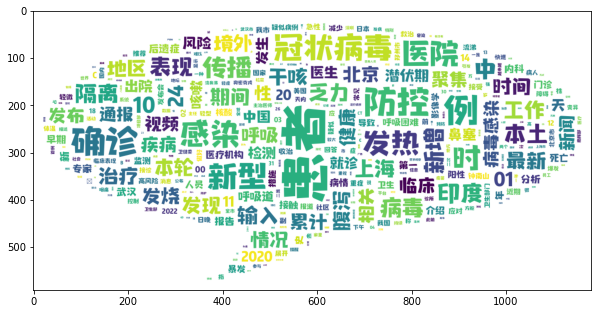

In [18]:
import collections 
from PIL import Image 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import numpy as np 
str1 = [data for line in data_after for data in line if data not in ['症状','疫情','新冠肺炎','病例','感染者','新冠','肺炎','无症状','无症状']] 
word_count = pd.Series(str1).value_counts() 
plt.figure(figsize=(10,6)) 
Marquez_mask = np.array(Image.open('D:/基于covid-19的可视化分析/duihuakuan.jpg')) 
wordcloud = WordCloud(font_path='D:\基于covid-19的可视化分析/WenYue-JuJiuWuTi-J-2.otf', 
                      mask=Marquez_mask, 
                      max_words=2000, 
                      background_color="white", 
                      margin=10 ).fit_words(word_count) 
plt.imshow(wordcloud) # 显示 
plt.show()